In [2]:
import numpy as np
#from matplotlib import *
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def rescale(x, M):
    if x>M/2:
        return rescale(x-M, M)
    elif x<-M/2:
        return rescale(x+M, M)
    else:
        return x
    
def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    fig = plt.figure()
    ax = plt.imshow([colors], extent=[0, 1, 0, .1])

### Not relevant

In [ ]:
#3d elements
u = np.linspace(0, 2 * np.pi, N)
v = np.linspace(0, np.pi, N)

x=np.linspace(0, 24,24)
y=np.linspace(0, 24,24)
#fig = plt.figure(figsize=(24,24))
#ax = plt.axes(projection="3d")
#ax.view_init(elev=90., azim=90)

def sphere(a, b):
    stride=2 #less is better
    r=2
    x = r*np.outer(np.cos(u), np.sin(v)) + a
    y = r*np.outer(np.sin(u), np.sin(v)) +b
    z = r*np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, linewidth=0.0,color="lightblue", cstride=stride, rstride=stride)

### _______________________________________________________________________________________

In [4]:
l = 0
N=484
C=[]
with open("test.patch", "r") as snap:   #particle positions
    for line in snap:
        if l==0:
            N = int(line[1:])
            l=l+1
        elif l==1:
            tmp=[x for x in line.split()]
            xsize, ysize = float(tmp[0]), float(tmp[1])
            l=l+1
        else:
            tmp=[x for x in line.split()]
            C.append([rescale(float(tmp[1]), xsize), rescale(float(tmp[2]), ysize)])
            #C.append([float(tmp[1]), float(tmp[2])])
            
l = 0
events=[]
with open("breaklist_80.500.dat", "r") as file:  #Breaking Times
    for line in file:
        if l==0:
            l=l+1
        elif l==1:
            tmp=[x for x in line.split()]
            time = float(tmp[-1])
            l=l+1
        else:
            tmp=[x for x in line.split()]
            events.append([int(tmp[0]), int(tmp[1]), float(tmp[3])])
            

NameError: name 'y' is not defined

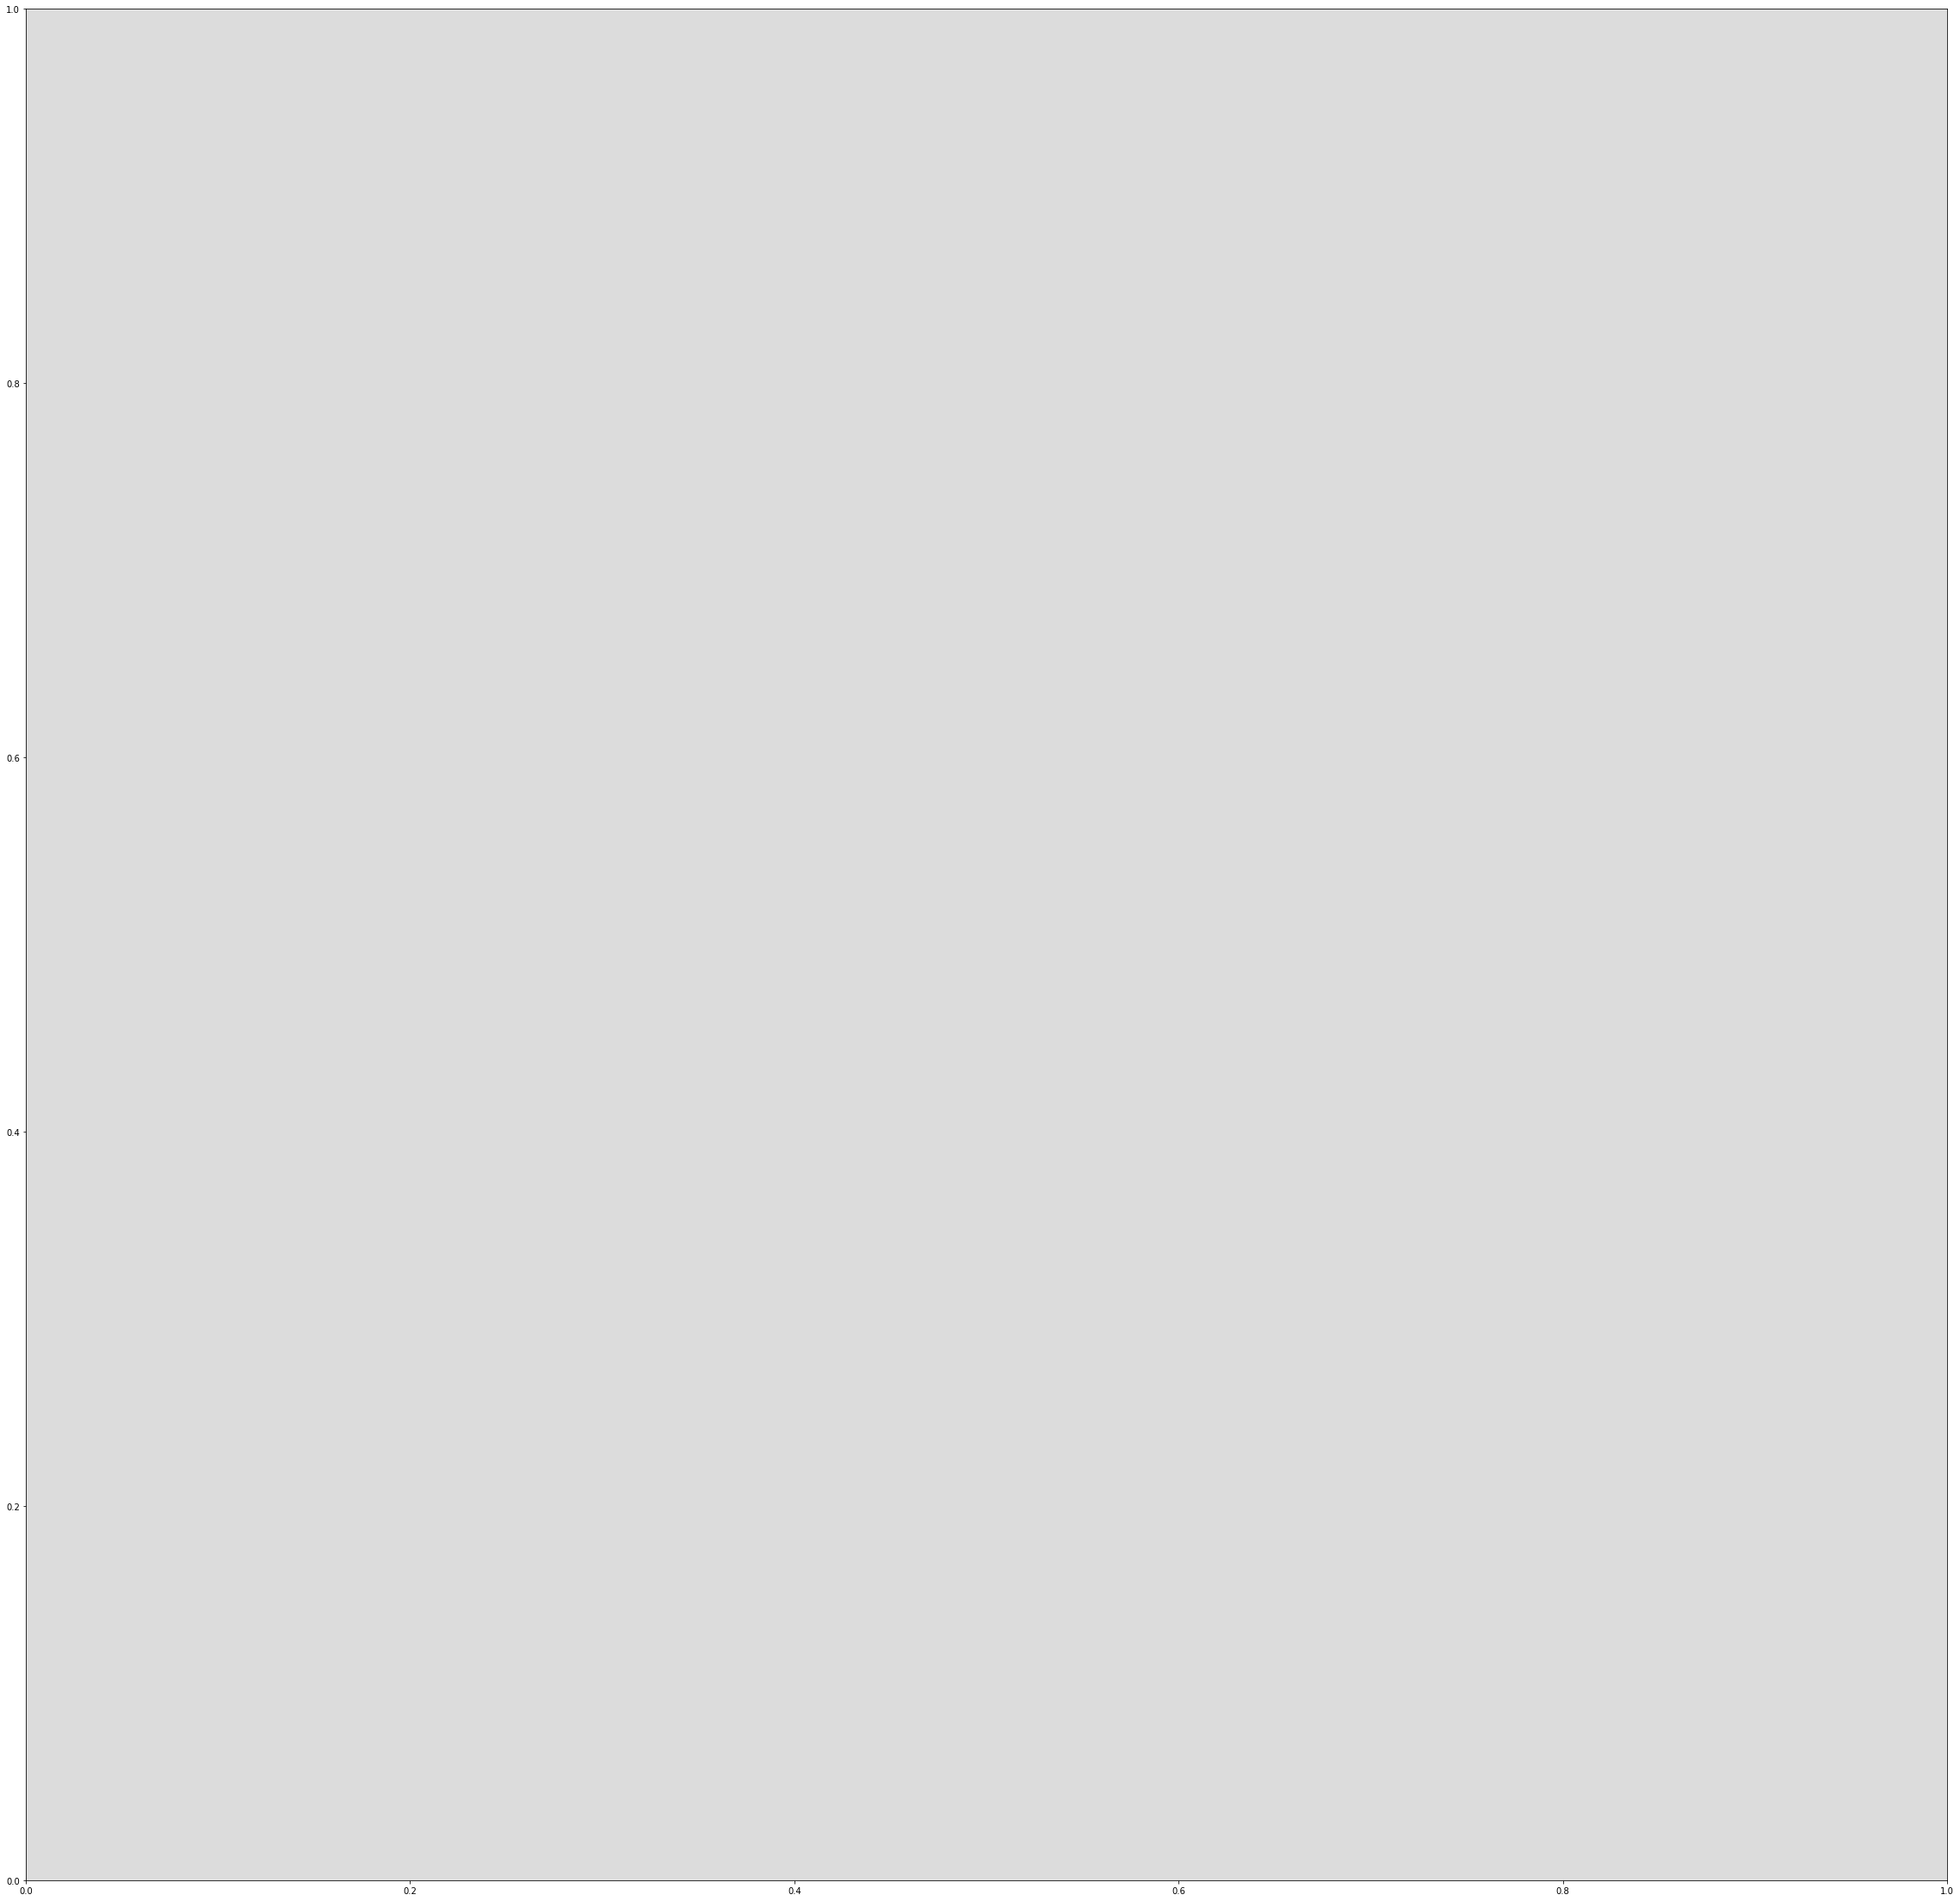

In [5]:
aev=np.array(events)
aC=np.array(C)

t_b = time/aev[:,2]
m = np.mean(t_b)
std = np.std(t_b)
t_b=(((t_b-m)/std)+1)/2

fig = plt.figure(figsize=(40,40))
ax = plt.axes()
ax.set_facecolor('gainsboro')
δ = .6

for ev in range(aev[:,2].size):   #Bonds
    col = pl.cm.seismic(t_b[ev])
    r1 = np.array(C[int(aev[ev,0])][:])
    r2 = np.array(C[int(aev[ev,1])][:])
    dr = (r2 - r1)
    ax.plot([r1[0], r1[0]-δ*dr[0]/np.linalg.norm(dr)], [r1[1], r1[1]-δ*dr[1]/np.linalg.norm(dr)], y, color=col, linewidth=9, zorder=1)
    ax.plot([r2[0], r2[0]+δ*dr[0]/np.linalg.norm(dr)], [r2[1], r2[1]+δ*dr[1]/np.linalg.norm(dr)], y, color=col, linewidth=9, zorder=1)
    
#for c in C:
    #sphere(c[0], c[1])
    
ax.scatter(aC[:,0], aC[:,1], s=2000, zorder=2)   #Particles
view_colormap('seismic')
plt.show()